<a href="https://colab.research.google.com/github/Fanusaez/Organizacion-de-Datos/blob/main/Pandas/Pandas_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Introducción a la Ciencia de Datos</center>
### <center> Práctica Pandas y Visualizaciones</center>

In [111]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


En esta notebook vamos a trabajar con los siguientes conjuntos de datos (datasets):

*   iris.csv
*   peliculas.csv
*   attacks.csv
*   dolar_oficial_ambito.csv
*   spotify.csv

A continuación se encuentran los ejercicios que tenemos que realizar:

## Ejercicio 1 - Dataset Iris

El conjunto de datos iris contiene medidas de longitud y ancho de pétalos y sépalos de flores de tres especies de Iris recogidas por el botánico Edgar Anderson. Es uno de los datasets más clásicos en el mundo del Machine Learning. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

#### a) Cargar los datos en un dataframe de pandas.

* ¿Cuál es la cantidad de filas del datset? ¿y la cantidad de columnas?
* ¿Cuáles son los tipos de datos de cada columna?
* Mostrar los datos de las 5 primeras filas
* Mostrar si existen datos faltantes (N/A)



In [112]:
import pandas as pd

iris = pd.read_csv('/gdrive/My Drive/Datasets/iris.csv')
iris.shape

(150, 5)

El dataset contiene 150 filas y 5 columnas

In [113]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Cada observacion corresponde a una flor sobre ella se midieron el largo y el ancho del sepalo y el ancho y el largo del pétalo. También se registra cuál es la especie de cada flor.

In [114]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [115]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

En Python, el tipo de datos de texto se conoce como secuencia de caracteres (string). En Pandas se los conoce como objetos (object). Las secuencias de caracteres pueden contener números y / o caracteres. 

In [116]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Podemos ver que ninguna columna tiene valores faltante

### b) Medidas de resumen

* Cuál es la cantidad de observaciones de cada especie
* Crear un nuevo dataframe **iris_mean** que contenga el promedio de cada variable del dataset agrupado por especie
* Crear un nuevo dataframe **iris_resumen_setosa** que contenga las medidas de resumen para la espcie setosa.(cantidad total, media, minimo,maximo,desviacion estandar y cuantiles) 

In [117]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Vemos que hay 50 flores de cada especie

In [118]:
iris_mean=iris.groupby(['species']).mean()
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


La especie setosa tiene el menor ancho promedio de pétalo y la especie virgínica el mayor largo promedio de sépalo.


In [119]:
iris_setosa_resumen=iris[iris.species=='setosa'].describe()
iris_setosa_resumen

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Para la especie setosa podemos ver que las mediciones del sépalo son las que presentan mayor desvío estándar 

###c)  Realizar los siguientes gráficos:
* grafico de barras para la cantidad de obsevaciones por especie
* scatter plot el largo del sépalo y el ancho del sépalo coloreando las observaciones por especie.
* scatter plot el largo del pétalo y el ancho del pétalo coloreando las observaciones por especie.
* histograma del largo del petalo para cada especie
* boxplot comparativos por especie para cada variable

In [120]:
#Vamos a usar seaborn y matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

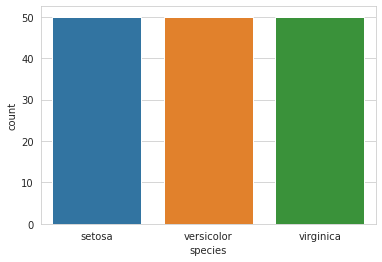

In [121]:
#Grafico de Barras
sns.countplot(x='species', data=iris, )
plt.show()

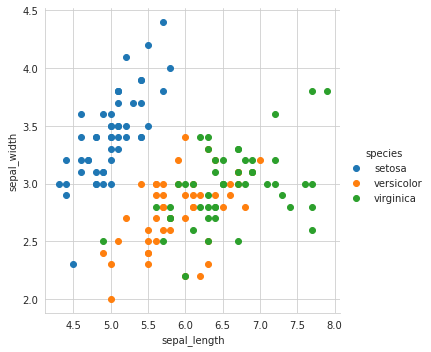

In [122]:
#Grafico scatter plot sepalos
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species", height = 5).map(plt.scatter,'sepal_length','sepal_width').add_legend()


¿Qué podemos ver en este scatter plot? 

La especie Setosa tiene sépalos más pequeños pero anchos de sépalos más grandes.

La especie Virginica tiene sépalos más largos pero anchos de sépalos más pequeños.

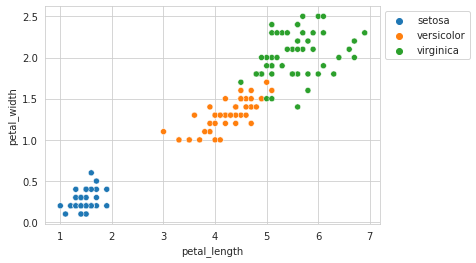

In [123]:
#Grafico scatter plot petalos
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data=iris )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

¿Qué podemos ver en este scatter plot? 

La especie Setosa tiene pétalos de menor longitud y anchura.

La especie Virginica tiene la mayor longitud y anchura de los pétalos.

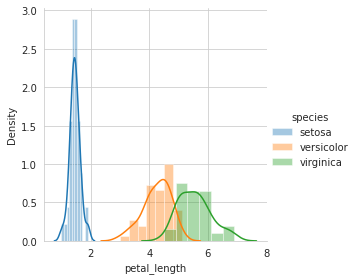

In [124]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Histograma del largo del petalo
plot = sns.FacetGrid(iris, hue="species",height=4)
plot.map(sns.distplot, "petal_length").add_legend()

¿Qué podemos ver en este gráfico? ...


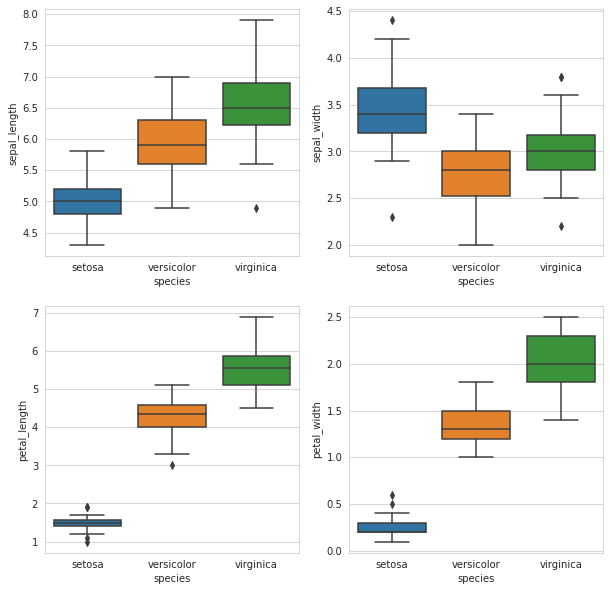

In [125]:
#Grafico boxplots 

plt.figure(figsize=(10,10))
      
plt.subplot(221)
sns.boxplot(x="species", y='sepal_length', data=iris)
  
plt.subplot(222)
sns.boxplot(x="species", y='sepal_width', data=iris)
  
plt.subplot(223)
sns.boxplot(x="species", y='petal_length', data=iris)
  
plt.subplot(224)
sns.boxplot(x="species", y='petal_width', data=iris)
  
plt.show()

### Bonus track!

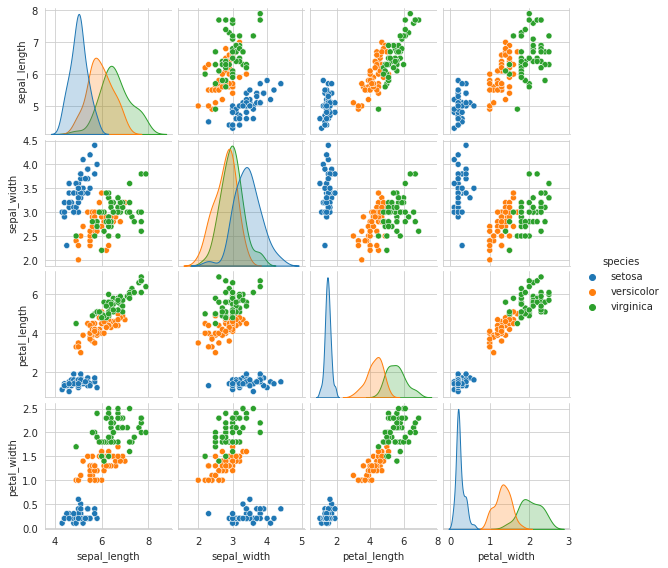

In [126]:
# Gráfico de a pares
sns.pairplot(iris, hue='species', height=2)


####  Realizar un gráfico a elección sobre el conjunto de datos indicando que información se puede obtener de dicha visualización

## Ejercicio 2 - Dataset Películas

El conjunto de datos contiene información de IMDB sobre algunas películas estrenadas durante los años 1995 y 1996. Se coonce el título de las películas, el pesupuesto invertido, los ingresos obtenidos y la popularidad entre otros.

#### a) Cargar el dataset en un dataframe de pandas

* ¿Cuál es la cantidad de filas del datset? ¿y la cantidad de columnas?
* Listar los nombres de las columnas y sus tipos de dato.
* Mostrar los datos de las 5 primeras filas
* Mostrar si existen datos faltantes (N/A)
¿Qué porcentaje representan del total de datos?

In [127]:
ds_pelis = pd.read_csv('/gdrive/My Drive/Datasets/peliculas.csv')
ds_pelis.shape

(49, 24)

In [128]:
ds_pelis.dtypes

adult                       bool
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                    int64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
dtype: object

In [129]:
ds_pelis.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [130]:
nans = ds_pelis.isna().sum().sum()
cant_de_datos = ds_pelis.shape[0] * ds_pelis.shape[1]
porcentaje_nans = (nans * 100) / cant_de_datos
porcentaje_nans

9.438775510204081

#### b)  Generar un nuevo dataframe **dataset_peliculas** que contenga las siguientes columnas: 

* *original_title*
* *title* 
* *adult*
* *original_language*
* *popularity*
* *budget*
* *release_date*
* *revenue*
* *vote_count*

Verificar si existen datos faltantes, en ese caso eliminar las filas que los contengan. 

A partir del atributo release_date generar dos nuevos atributos **year y month**

Guardar el dataset en un archivo csv con el nombre dataset_peliculas.

In [131]:

ds_peliculas = ds_pelis.copy()
ds_peliculas = ds_peliculas[["original_title", "title", "adult", "original_language", "popularity", "budget", "release_date", "revenue", "vote_count"]]
ds_peliculas.head()

,original_title,title,adult,original_language,popularity,budget,release_date,revenue,vote_count
0,Toy Story,Toy Story,False,en,21.946943,30000000.0,1995-10-30,373554033,5415
1,Jumanji,Jumanji,False,en,17.015539,65000000.0,1995-12-15,262797249,2413
2,Grumpier Old Men,Grumpier Old Men,False,en,11.712900,NaN,1995-12-22,0,92
3,Waiting to Exhale,Waiting to Exhale,False,en,3.859495,16000000.0,1995-12-22,81452156,34
4,Father of the Bride Part II,Father of the Bride Part II,False,en,8.387519,0.0,1995-02-10,76578911,173


In [132]:

ds_peliculas.dropna(inplace = True)
ds_peliculas.isna().sum().sum()

0

In [133]:
ds_peliculas.to_csv('ds_peliculas.csv')

#### c) Responder las siguientes preguntas sobre los datos del  **dataset_peliculas** generado en el punto b.

* ¿Cuál es el idioma más popular de las películas?
Generar un dataframe **idiomas** que contenga una columna *idioma* y otra *cantidad* donde se pueda ver la cantidad de veces que aparece cada idioma en en el dataset. 

* ¿Qué películas tienen un *revenue* mayor al promedio?
Generar un dataframe **mayor_revenue** que contenga una columna *titulo* y otra *revenue* con las películas que tengan un revenue mayor al promedio.

* ¿Cuál fue la rentabilidad (revenue - budget) de cada película?
Generar un dataframe **rentabilidad** conlas columnas *titulo, rentabildad, revenue y budget** ordenado de mayor a menor. 
¿Qué peliculas fueron las más rentables?
¿Cuáles no fueron rentables?


In [134]:
idiomas = ds_peliculas["original_language"].value_counts().to_frame().reset_index().rename(columns={"index" : "idioma"})
idiomas

,idioma,original_language
0,en,32
1,fr,1


In [135]:
promedio = ds_peliculas["revenue"].mean()
ds_promedio = ds_peliculas[["title", "revenue"]]
ds_promedio = ds_promedio[ds_promedio["revenue"] > promedio]
ds_promedio


,title,revenue
0,Toy Story,373554033
1,Jumanji,262797249
5,Heat,187436818
9,GoldenEye,352194034
15,Casino,116112375
16,Sense and Sensibility,135000000
18,Ace Ventura: When Nature Calls,212385533
20,Get Shorty,115101622
29,Dangerous Minds,180000000
30,Twelve Monkeys,168840000


In [136]:
rentabilidad = ds_peliculas[["title", "revenue", "budget"]]
rentabilidad["rentabilidad"] = rentabilidad["revenue"] - rentabilidad["budget"]
rentabilidad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,revenue,budget,rentabilidad
0,Toy Story,373554033,30000000.0,343554033.0
1,Jumanji,262797249,65000000.0,197797249.0
3,Waiting to Exhale,81452156,16000000.0,65452156.0
4,Father of the Bride Part II,76578911,0.0,76578911.0
5,Heat,187436818,60000000.0,127436818.0
6,Sabrina,0,58000000.0,-58000000.0
9,GoldenEye,352194034,58000000.0,294194034.0
10,The American President,107879496,62000000.0,45879496.0
12,Balto,11348324,0.0,11348324.0
13,Nixon,13681765,44000000.0,-30318235.0


#### d) Realizar los siguientes gráficos

* Realizar un gráfico de barras que permita ver la cantidad de películas estrenadas por mes durante el año 1996.

* Realizar un scatter plot de budget vs revenue
¿Qué podemos ver en el scatter plot? ¿Les llama la atención alguna/s observacion/es ?

* Realizar un pairplot con todas las variables cuantitativas.

In [149]:
ds_peliculas["release_date"] = pd.to_datetime(ds_peliculas["release_date"],errors='ignore', dayfirst = False)
ds_year = ds_peliculas.copy()
ds_year = ds_year.loc[ds_year["release_date"].dt.year == 1995]["release_date"].dt.month.value_counts()
ds_year.sort_index(inplace = True)

dtype('int64')

## Ejercicio 3 - Dataset Ataque de Tiburones

El conjunto de datos contiene un registro de los ataques de tiburones que ocurrieron en distintos países en los últimos 200 años. Se identifica el caso, el país,el sexo de la persona y su edad entre otros.

#### a) Cargar el dataset en un dataframe de pandas realizar un análisis exploratorio

#### b) Realizar un gráfico de barras para el atributo Country. ¿Cuáles son los dos países con mayor cantidad de ataque de tiburones?

#### c) Crear un nuevo dataframe **shark_attacks** que contenga unicamente los ataques correspondientes a los dos países del punto b

#### d) Registros con valores inconsistentes:
* La varible "Sex" debe contener únicamente los valores F, M . Eliminar los que no correspondan y también los valores faltantes.
* La variable "Age" debe contener únicamente valores numéricos.Eliminar los valores que no correspondan, reemplazar los valores faltantes por 0 y convertir el tipo de dato a entero.
* La variable Year debe contener únicamente valores del tipo AAAA (Ej: 1890,1916,etc). Modificar los valores y convertir el tipo de dato a entero. *Hint : str.replace(...)* . Filtrar los registros desde el 1800 en adelante.

#### e) Mostrar la cantidad de observaciones para cada categoría de la variable **Activity** . Mantener las categorias mas representativas y el resto unificarlas bajo la etiequeta **Other**

#### f) Realizar una tabla cruzada para las siguientes combinaciones de variables:

* Country-Sex
* Country-Type
* Year-Sex para los últimos 10 años.

#### g) Realizar los siguientes gráficos:

* Grafico de Violin: colocar en el eje horizontal la variable **Sex** y en el eje vertical la variable **Age** seleccionado sólo los registros donde la edad sea mayor a 0.

* Gráfico de densidad para la variable **Age** por sexo, seleccionado sólo los registros donde la edad sea mayor a 0.

* Gráfico de barras con la cantidad de accidentes por año por país para los últimos 60 años.

## Ejercicio 4 - Dataset Dolar

El conjunto de datos contiene la cotización oficial diaria del dólar para la compra y para la venta públicada en ámbito financiero.


#### a) Realizar un análisis exploratorio, mostrando el tamaño del dataset, los nombres de las columnas, los tipos de datos y las mediadas de resumen.
¿Hay valores faltantes?

#### b) Realizar las siguientes conversiones y generar los nuevos dataframes solicitados:

* Convertir el atributo **fecha** en tipo de dato *date*. *Hint : pandas.to_datetime(...)*

* A partir del atributo **fecha** generar tres nuevas columnas : **dia, mes, año**.

* Generar un nuevo DataFrame **dolar_prom_mes** que contenga la cotización promedio mensual (para la compra y para la venta) de cada mes. El DF debe tener las siguientes columnas: **año,mes,venta_prom_mes,compra_prom_mes**

* Generar un nuevo DataFrame **dolar_maxmin_mes** que contenga la cotización más alta y la mas baja de cada mes. El DF debe tener las siguientes columnas: **año,mes,venta_max_mes,venta_min_mes,compra_max_mes, compra_min_mes**

* Generar un nuevo DataFrame **dolar_hist** que contenga las cotizaciones diarias junto con la máxima, la mínima y la promedio del mes. El DF debe tener las  siguientes columas: **año, mes, dia, compra, compra_prom, compra_max_mes, compra_min_mes, venta, venta_prom_mes, venta_max_mes, venta_min_mes**

* Generar un nuevo DataFrame **dolar_long** con las siguientes columnas: **año, mes, tipo_cot, cot** donde la variable **tipo_cot** tome los valores literales 'compra' o 'venta' y la varibale **cot** la cotización correspondiente. *Hint: pandas.melt(....)*

#### c) Realizar los siguientes gráficos:
* Boxplots comparativos de la cotización de venta por año.
* Boxplots comparativos de la cotización de venta por mes para el año 2019.
* Gráfico de la serie de tiempo de la cotización de compra y de venta diaria. Plus: Incluir en el gráfico la tendencia promedio mensual.
* Gráfico a elección con el dataset **dolar_long** que permita obtener información diferente a la obtenida a partir los gráficos anteriores.

## Ejercicio 5  - Spotify

El conjunto de datos contiene información sobre algunos tracks (canciones) de spotify. Entre los datos disponibles encontramos el género, la popularidad, la duracion y una serie de features de audio como el tempo, la valencia etc.

Para conocer en detalle cada atributo consultar el siguiente link:

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

### Parte I

1.   Realizar una descripción del dataset detallando nombres de las columnas, tipos de datos y descripción de cada una.
2.   Mostrar un conjunto reducido de filas (las primeras y las últimas)
3.   Reportar cantidad de valores nulos por columna.
4.   Variables cualitativas:
  *  Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de filas correspondientes a cada uno.
  Armar un nuevo dataframe con estos datos.
  *   Compare en un gráfico de barras la cantidad de filas pertenecientes
  a cada valor.¿Es posible realizar este gráfico con un histograma? Explique las diferencias entre estos dos tipos de gráficos.
5.   Variables cuantitativas:
  * Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un nuevo dataframe con estos datos:
      * Media
      * Mediana
      * Moda
      * Primer y tercer cuartil
      * Rango
  * Correlación de atributos
      * Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
      * Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un gráfico de tipo heatmap
      ¿Existen variables correlacionadas? ¿Es esperable o no?


### Parte II

1.   A partir de la exploración realizada plantear dos preguntas de investigación que les resulten interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
entre el género musical y alguna de las otras variables?

2.   Elegir dos visualizaciones que permitan abordar sus preguntas de
investigación e interpretar los resultados.